In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
train_ds="/kaggle/input/birds-20-species-image-classification/train"
test_ds="/kaggle/input/birds-20-species-image-classification/test"
validation_ds="/kaggle/input/birds-20-species-image-classification/valid"

In [3]:
os.listdir('/kaggle/input/birds-20-species-image-classification/train')

['AMERICAN KESTREL',
 'AMERICAN GOLDFINCH',
 'AFRICAN PYGMY GOOSE',
 'ABYSSINIAN GROUND HORNBILL',
 'ALBERTS TOWHEE',
 'AFRICAN EMERALD CUCKOO',
 'ALBATROSS',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'ABBOTTS BABBLER',
 'AFRICAN FIREFINCH',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'AMERICAN FLAMINGO',
 'AMERICAN AVOCET',
 'ALTAMIRA YELLOWTHROAT',
 'AFRICAN PIED HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN OYSTER CATCHER',
 'ABBOTTS BOOBY']

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator 
                                 


valid_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize validation generator 

test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [5]:
train_generator = train_datagen.flow_from_directory(train_ds, target_size=(150,150),batch_size=32,class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(validation_ds, target_size=(150,150),batch_size=32,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds, target_size=(150,150),batch_size=32,class_mode='categorical')

Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [6]:
test_generator[0][0].shape

(32, 150, 150, 3)

In [7]:
validation_generator[0][0].shape

(32, 150, 150, 3)

In [8]:
train_generator[0][0].shape

(32, 150, 150, 3)

In [9]:
img= train_generator[0]
print(img)

(array([[[[0.2627451 , 0.5921569 , 0.82745105],
         [0.2627451 , 0.5921569 , 0.82745105],
         [0.2627451 , 0.5921569 , 0.82745105],
         ...,
         [0.42352945, 0.6       , 0.7607844 ],
         [0.5529412 , 0.61960787, 0.6901961 ],
         [0.6392157 , 0.5254902 , 0.454902  ]],

        [[0.27058825, 0.5921569 , 0.82745105],
         [0.27058825, 0.5921569 , 0.82745105],
         [0.27058825, 0.5921569 , 0.82745105],
         ...,
         [0.40784317, 0.58431375, 0.74509805],
         [0.5176471 , 0.58431375, 0.654902  ],
         [0.6117647 , 0.5058824 , 0.43137258]],

        [[0.27058825, 0.5921569 , 0.82745105],
         [0.27058825, 0.5921569 , 0.82745105],
         [0.27058825, 0.5921569 , 0.82745105],
         ...,
         [0.40000004, 0.5764706 , 0.7372549 ],
         [0.49411768, 0.56078434, 0.6313726 ],
         [0.6039216 , 0.49803925, 0.43137258]],

        ...,

        [[0.30980393, 0.5921569 , 0.8235295 ],
         [0.30980393, 0.5921569 , 0.8235295 

In [10]:
print(len(train_generator))
print(len(test_ds))
print(len(validation_ds))

101
56
57


In [11]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

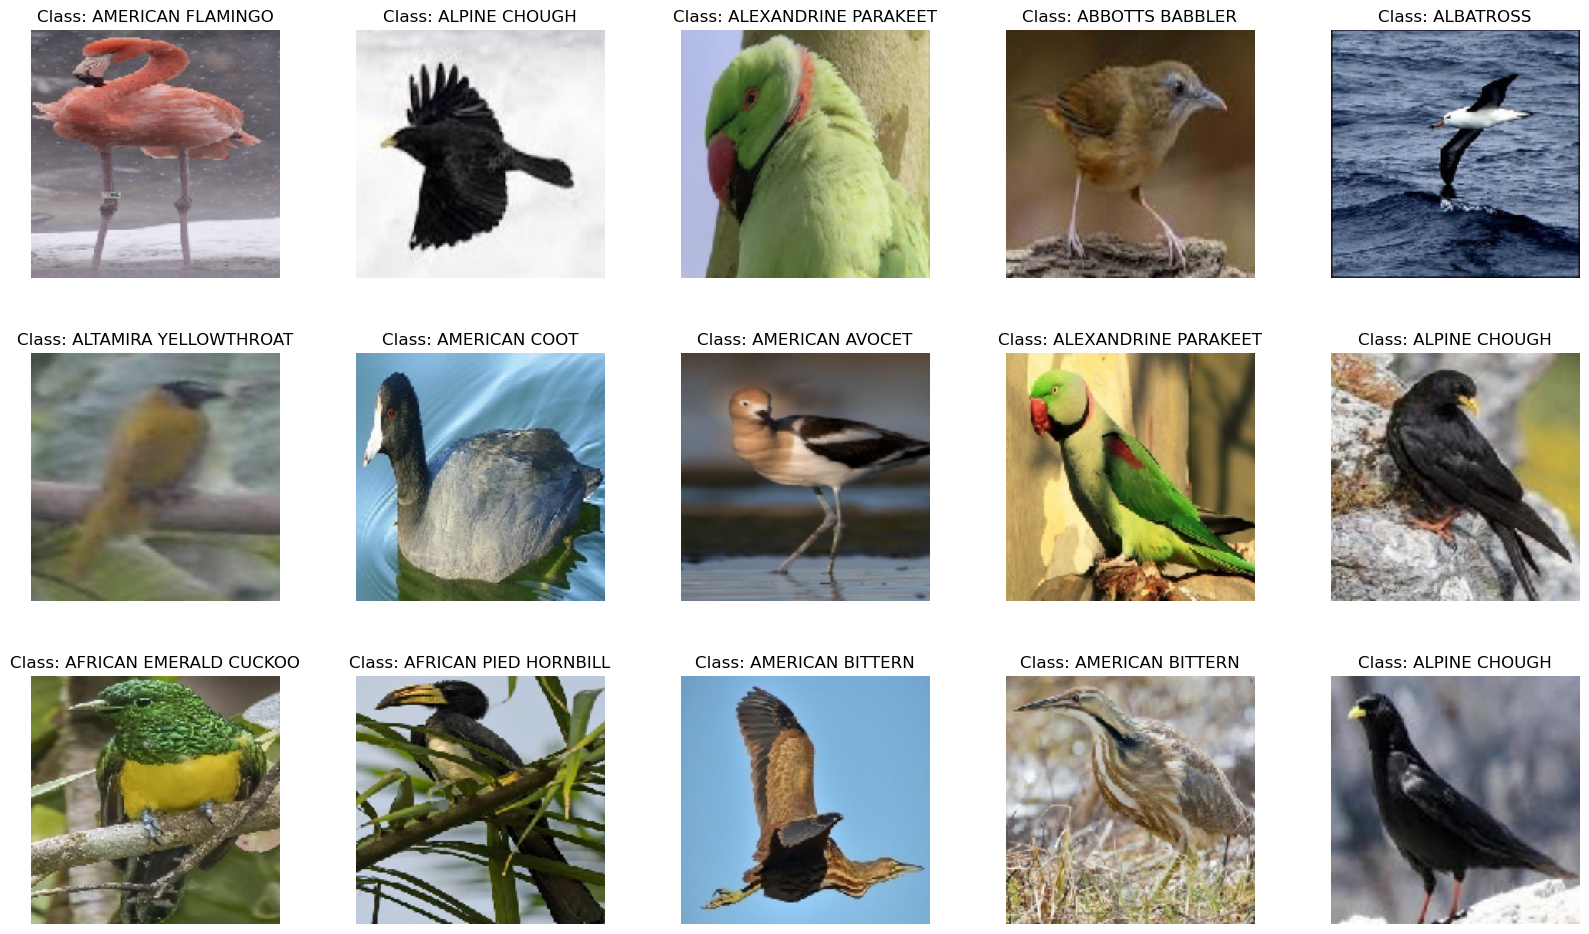

In [12]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

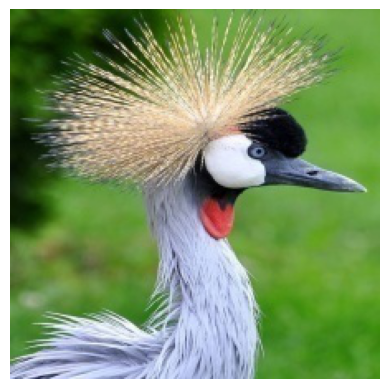

In [13]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/kaggle/input/birds-20-species-image-classification/images to predict/4.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# Build the Sequential feedforward neural network model

seq_model = Sequential([ 
    Flatten(input_shape=(150,150,3), name='input_layer'),
      Dense(128, activation='relu', name='layer1'),
    Dense(64, activation='relu', name='layer2'),
    # Dense(64, activation='relu', name='layer2'),
    Dense(32, activation='relu', name='layer3'),
    # Dense(32, activation='relu', name='layer4'),
    Dense(20, activation='softmax', name='output_layer')
])

In [16]:
# Print the model summary

seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 67500)             0         
                                                                 
 layer1 (Dense)              (None, 128)               8640128   
                                                                 
 layer2 (Dense)              (None, 64)                8256      
                                                                 
 layer3 (Dense)              (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 20)                660       
                                                                 
Total params: 8,651,124
Trainable params: 8,651,124
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras.optimizers import Adam

seq_model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [18]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels


(32, 150, 150, 3)
(32, 20)


In [19]:
history = seq_model.fit(train_generator,
                    epochs=5,
                    validation_data=validation_generator,
                    
                   )

Epoch 1/5
101/101 [==============================] - 17s 127ms/step - loss: 2.9958 - accuracy: 0.0863 - val_loss: 2.8532 - val_accuracy: 0.1300
Epoch 2/5
101/101 [==============================] - 7s 73ms/step - loss: 2.7629 - accuracy: 0.1509 - val_loss: 2.7074 - val_accuracy: 0.1600
Epoch 3/5
101/101 [==============================] - 7s 71ms/step - loss: 2.6181 - accuracy: 0.2070 - val_loss: 2.6983 - val_accuracy: 0.2100
Epoch 4/5
101/101 [==============================] - 8s 77ms/step - loss: 2.4975 - accuracy: 0.2382 - val_loss: 2.5302 - val_accuracy: 0.1800
Epoch 5/5
101/101 [==============================] - 7s 71ms/step - loss: 2.3531 - accuracy: 0.2796 - val_loss: 2.3218 - val_accuracy: 0.2700


In [20]:
n_categories = len(os.listdir('/kaggle/input/birds-20-species-image-classification/train'))# number of categories
print(n_categories)

20


In [21]:
results = pd.DataFrame(history.history)
results.tail()

,loss,accuracy,val_loss,val_accuracy
0,2.995820,0.086347,2.853206,0.13
1,2.762869,0.150873,2.707367,0.16
2,2.618111,0.206983,2.698299,0.21
3,2.497487,0.238155,2.530198,0.18
4,2.353073,0.279613,2.321813,0.27


In [22]:
results = pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,2.995820,0.086347,2.853206,0.13
1,2.762869,0.150873,2.707367,0.16
2,2.618111,0.206983,2.698299,0.21
3,2.497487,0.238155,2.530198,0.18
4,2.353073,0.279613,2.321813,0.27


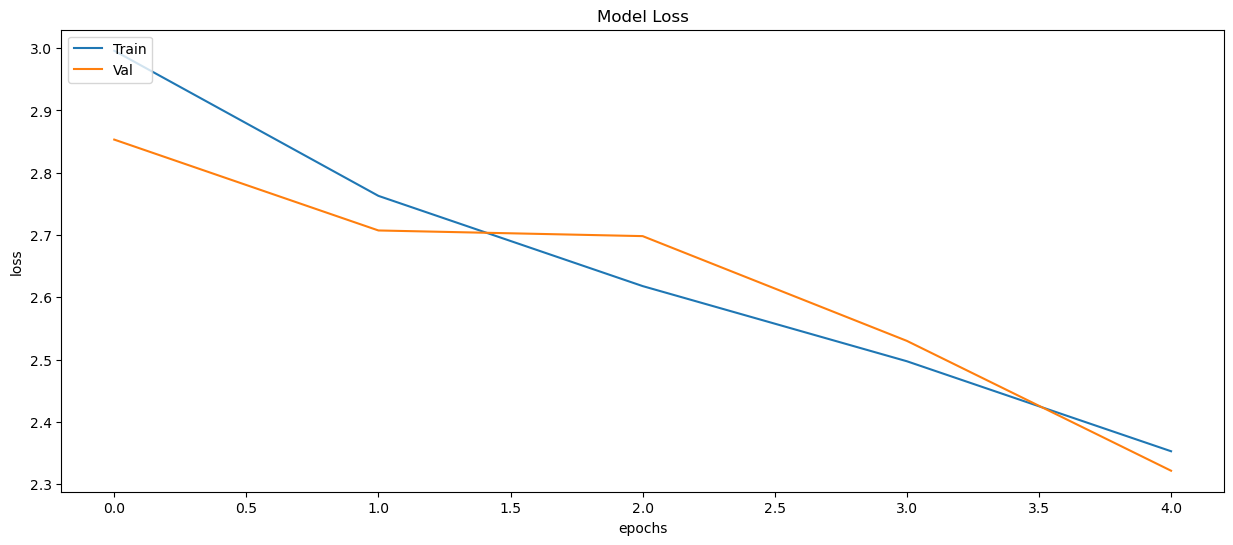

In [23]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

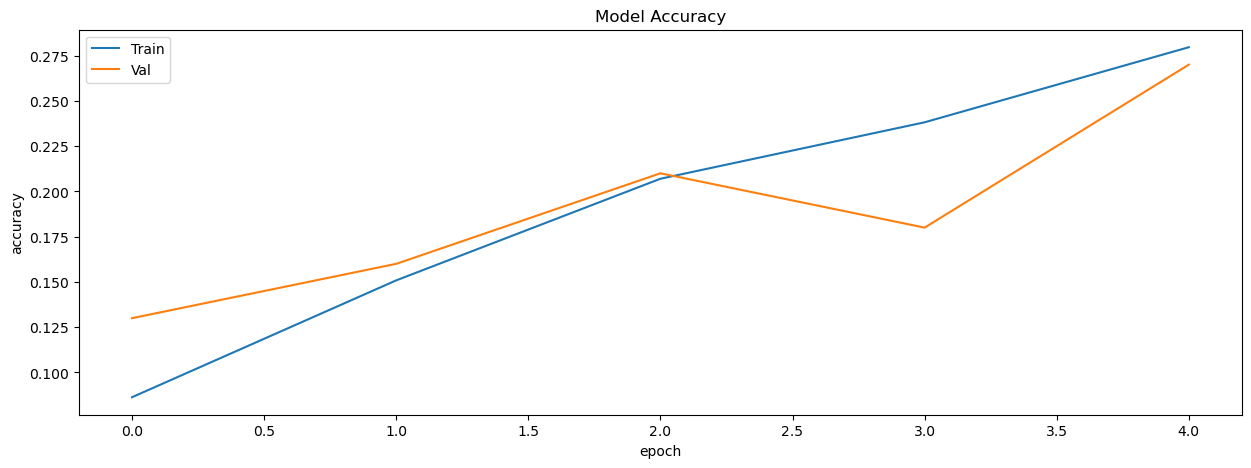

In [24]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [25]:
history = seq_model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator,
                    
                   )

Epoch 1/15
101/101 [==============================] - 7s 70ms/step - loss: 2.2264 - accuracy: 0.3264 - val_loss: 2.1894 - val_accuracy: 0.3200
Epoch 2/15
101/101 [==============================] - 7s 72ms/step - loss: 2.1211 - accuracy: 0.3625 - val_loss: 2.1891 - val_accuracy: 0.3200
Epoch 3/15
101/101 [==============================] - 7s 73ms/step - loss: 2.0416 - accuracy: 0.3844 - val_loss: 2.0946 - val_accuracy: 0.3400
Epoch 4/15
101/101 [==============================] - 7s 70ms/step - loss: 1.9794 - accuracy: 0.4009 - val_loss: 2.0753 - val_accuracy: 0.4000
Epoch 5/15
101/101 [==============================] - 7s 70ms/step - loss: 1.8863 - accuracy: 0.4252 - val_loss: 1.9601 - val_accuracy: 0.3800
Epoch 6/15
101/101 [==============================] - 7s 71ms/step - loss: 1.7983 - accuracy: 0.4554 - val_loss: 1.9577 - val_accuracy: 0.4200
Epoch 7/15
101/101 [==============================] - 7s 74ms/step - loss: 1.7514 - accuracy: 0.4698 - val_loss: 1.9474 - val_accuracy: 0.4100

In [26]:
results = pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,2.226425,0.326372,2.189437,0.32
1,2.121113,0.362531,2.189056,0.32
2,2.041650,0.384352,2.094571,0.34
3,1.979355,0.400873,2.075337,0.40
4,1.886284,0.425187,1.960111,0.38


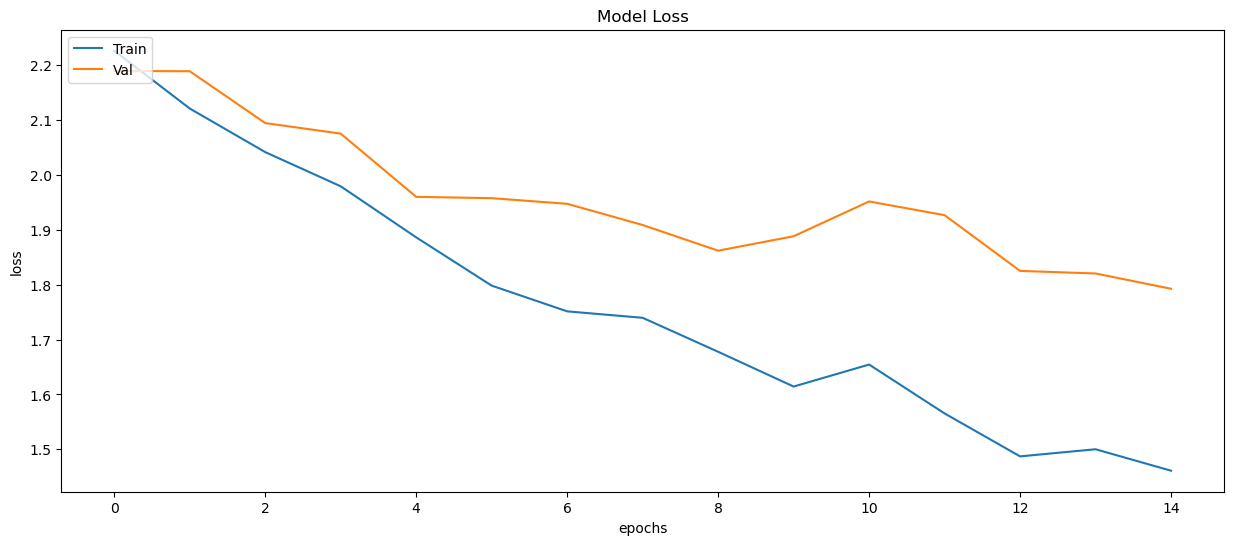

In [27]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

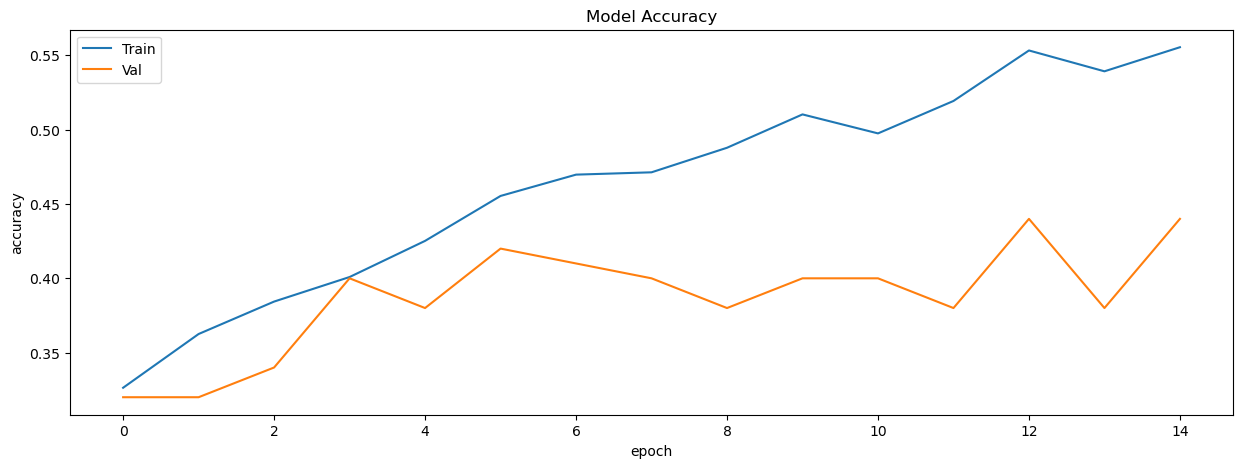

In [28]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [29]:
history = seq_model.fit(train_generator,
                    epochs=30,
                    validation_data=validation_generator,
                    
                   )

Epoch 1/30
101/101 [==============================] - 7s 73ms/step - loss: 1.4020 - accuracy: 0.5764 - val_loss: 1.7546 - val_accuracy: 0.3800
Epoch 2/30
101/101 [==============================] - 7s 69ms/step - loss: 1.4011 - accuracy: 0.5795 - val_loss: 1.7121 - val_accuracy: 0.4500
Epoch 3/30
101/101 [==============================] - 7s 71ms/step - loss: 1.3474 - accuracy: 0.6044 - val_loss: 1.7217 - val_accuracy: 0.4600
Epoch 4/30
101/101 [==============================] - 7s 70ms/step - loss: 1.3248 - accuracy: 0.5979 - val_loss: 1.6765 - val_accuracy: 0.4600
Epoch 5/30
101/101 [==============================] - 7s 74ms/step - loss: 1.3081 - accuracy: 0.6047 - val_loss: 1.7416 - val_accuracy: 0.4700
Epoch 6/30
101/101 [==============================] - 7s 68ms/step - loss: 1.2826 - accuracy: 0.6188 - val_loss: 1.8685 - val_accuracy: 0.4000
Epoch 7/30
101/101 [==============================] - 7s 70ms/step - loss: 1.2717 - accuracy: 0.6185 - val_loss: 1.8606 - val_accuracy: 0.4300

In [30]:
results = pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,1.402046,0.576372,1.754632,0.38
1,1.401142,0.579489,1.712146,0.45
2,1.347363,0.604426,1.721708,0.46
3,1.324798,0.597880,1.676540,0.46
4,1.308088,0.604738,1.741622,0.47


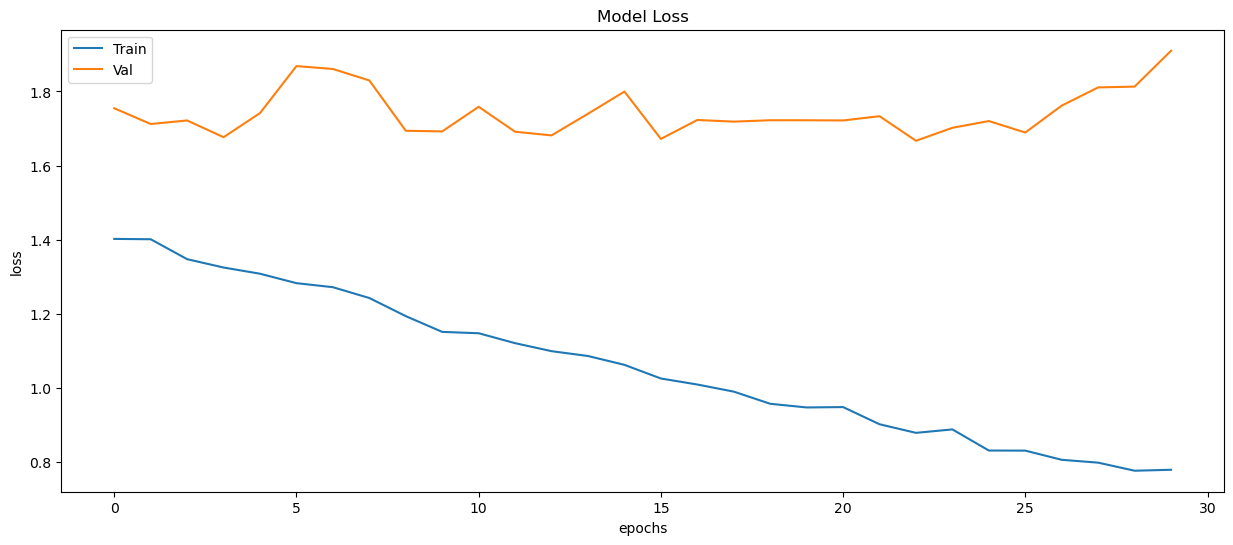

In [31]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

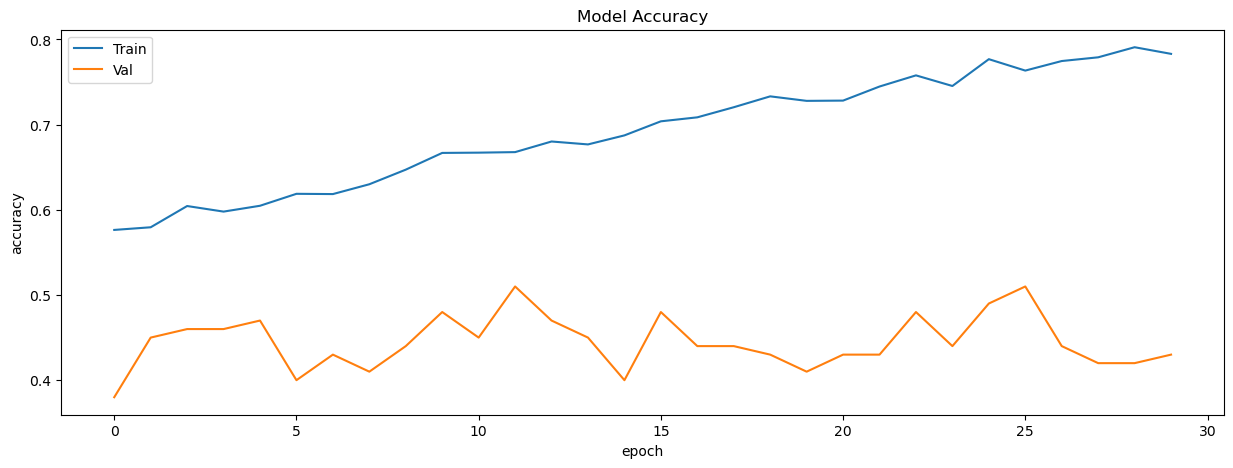

In [32]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [33]:
y_test_1 = test_generator.classes
y_pred_1 =seq_model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

4/4 [==============================] - 0s 105ms/step


In [34]:
results = seq_model.evaluate(test_generator)

4/4 [==============================] - 0s 50ms/step - loss: 1.5987 - accuracy: 0.5100


In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1,y_pred_1,target_names = labels))

                            precision    recall  f1-score   support

           ABBOTTS BABBLER       0.00      0.00      0.00         5
             ABBOTTS BOOBY       0.33      0.20      0.25         5
ABYSSINIAN GROUND HORNBILL       0.50      0.20      0.29         5
     AFRICAN CROWNED CRANE       0.00      0.00      0.00         5
    AFRICAN EMERALD CUCKOO       0.00      0.00      0.00         5
         AFRICAN FIREFINCH       0.09      0.20      0.13         5
    AFRICAN OYSTER CATCHER       0.10      0.20      0.13         5
     AFRICAN PIED HORNBILL       0.50      0.20      0.29         5
       AFRICAN PYGMY GOOSE       0.00      0.00      0.00         5
                 ALBATROSS       0.00      0.00      0.00         5
            ALBERTS TOWHEE       0.00      0.00      0.00         5
      ALEXANDRINE PARAKEET       0.00      0.00      0.00         5
             ALPINE CHOUGH       0.00      0.00      0.00         5
     ALTAMIRA YELLOWTHROAT       0.00      0.00

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1/1 [==============================] - 0s 64ms/step


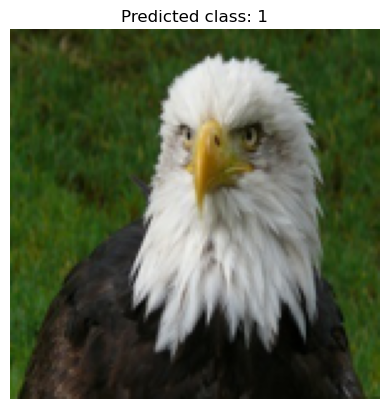

In [36]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/kaggle/input/birds-20-species-image-classification/images to predict'
img_size = 150

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions =seq_model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()


In [37]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : ABBOTTS BOOBY
Class probability: 0.60450876
Predicted class for 2.jpg : AMERICAN BITTERN
Class probability: 0.18133081
Predicted class for 3.jpg : ALBERTS TOWHEE
Class probability: 0.24537256
Predicted class for 4.jpg : AMERICAN KESTREL
Class probability: 0.25062135
Predicted class for 5.jpg : ALBERTS TOWHEE
Class probability: 0.3063409
Predicted class for 6.jpg : AFRICAN PIED HORNBILL
Class probability: 0.41188532
